### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

# 🟦 Pandas Pivot Table — Interview Notes

---

## 🟩 1. What is a Pivot Table?

A pivot table is used to **summarize data** by grouping rows and applying an **aggregation function** (sum, mean, count, etc.).

---

## 🟩 2. Why Use Pivot Table? (Interview Points)

- To summarize big datasets  
- Supports multiple aggregations  
- Handles duplicates safely  
- Alternative to `groupby + unstack`  
- Can fill missing values  
- Easy for reporting & analytics  

---

## 🟦 3. Syntax

```python
df.pivot_table(
    index=None,
    columns=None,
    values=None,
    aggfunc='mean',
    fill_value=None,
    margins=False
)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#trika:1
df.groupby('sex')[['total_bill']].mean()

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\2093847270.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [6]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [7]:
#2nd trika
df.pivot_table(index='sex',columns='smoker',values='total_bill')

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\4134744813.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [8]:
# aggfunction
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\1370620253.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [10]:
# all columns together
df.pivot_table(index='sex',columns='smoker',values='size')

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\4048404281.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='size')


smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [12]:
#multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\3666274664.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [13]:
#multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\173501849.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [14]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\1561592577.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [15]:
# plotting graphs
df=pd.read_csv('expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [16]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [18]:
df['Date']=pd.to_datetime(df['Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [27]:
df['month']=df['Date'].dt.month_name()

In [28]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

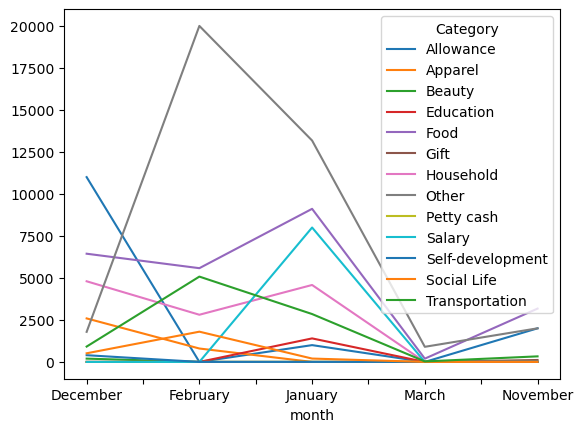

In [29]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

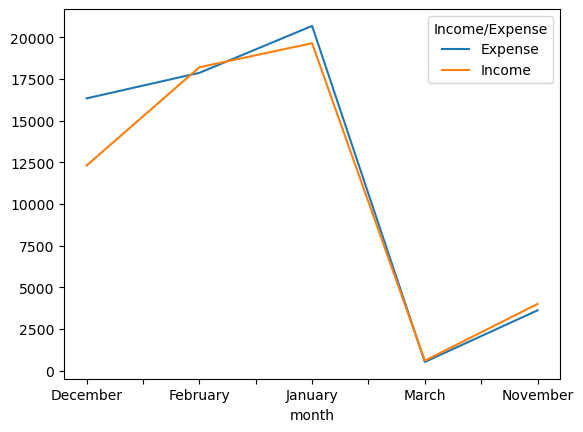

In [30]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

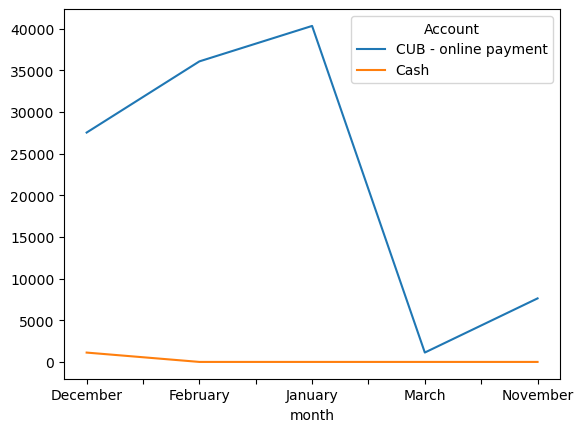

In [31]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

## Pandas Strings


---

# 🟦 Pandas String Functions — Interview Notes

---

## 🟩 1. What are Pandas String Functions?

Pandas string functions (`.str`) are used to **clean**, **manipulate**, and **analyze** text data in a Series.
They provide **vectorized operations**, meaning they work efficiently on entire columns.

---

## 🟩 2. Why Use String Functions? (Interview Points)

* Perform fast text operations on full columns
* Handle missing values (NaN) safely
* Provide regex support
* Useful for cleaning messy datasets
* Easier than Python loops or list comprehensions

---

## 🟦 3. Common Syntax

```python
df['column'].str.function_name(arguments)
```

## 🟩 . Interview Questions

### ❓ Q1: Why use `.str` instead of Python string methods?

**Answer:**
`.str` works on the entire Series (vectorized).
Python string methods work only on single string objects.

---

### ❓ Q2: How to split full name into first & last name?

```python
df[['first', 'last']] = df['Name'].str.split(' ', 1, expand=True)
```

---

### ❓ Q3: How to extract digits only?

```python
df['col'].str.extract(r'(\d+)')
```

---

### ❓ Q4: How to filter rows containing a keyword?

```python
df[df['comment'].str.contains('error', case=False)]
```

---

If you want this exported as **PDF / DOCX / PPTX / HTML**, just tell me!


In [32]:
# What are vectorized operations
a=np.array([1,2,3,4])
a
a*4

array([ 4,  8, 12, 16])

In [33]:
# problem in vectorized opertions in vanilla python
s=['cat','mat',None,'rat']

[i.startswith('c') for i in s]

AttributeError: 'NoneType' object has no attribute 'startswith'

In [34]:
# How pandas solves this issue?
s=pd.Series(['cat','mat',None,'rat'])
# use string accessor
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [39]:
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [41]:
# import titanic
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [43]:
# Common Functions
# lower/upper/capitalize/title
df['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [44]:
df['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [45]:
df['Name'].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [46]:
df['Name'].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [50]:
#len
df['Name'][df['Name'].str.len()]

23                      Sloper, Mr. William Thompson
51                      Nosworthy, Mr. Richard Cater
22                       McGowan, Miss. Anna "Annie"
44                     Devaney, Miss. Margaret Delia
24                     Palsson, Miss. Torborg Danira
                           ...                      
21                             Beesley, Mr. Lawrence
28                     O'Dwyer, Miss. Ellen "Nellie"
40    Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
21                             Beesley, Mr. Lawrence
19                           Masselmani, Mrs. Fatima
Name: Name, Length: 891, dtype: object

In [51]:
df['Name'][df['Name'].str.len()==82].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [52]:
#strip
'             arif    '.strip()

'arif'

In [53]:
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [54]:
# split-> get
df['lastname']=df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [59]:
df[['title','firstname']]=df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [61]:
df['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [62]:
# replace
df['title']=df['title'].str.replace('Ms.','Miss.')
df['title']=df['title'].str.replace('Mlle.','Miss.')

In [63]:
df['title'].value_counts()

title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Lady.          1
Mme.           1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [64]:
# filtering
# startswith/endswith
df[df['firstname'].str.endswith('A')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr.,Albert A
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,Keane,Miss.,Nora A


In [65]:
# isdigit/isalpha

df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [66]:
#applying regex
#contains
# search join
df[df['firstname'].str.contains('john',case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


In [68]:
# find last names with start and end char vowel
df[df['lastname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.,Timothy J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr.,Henry Jr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [69]:
# slicing
df['Name'].str[::-1]

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object


---

# 🟦 Pandas Date & Time Handling — Interview Notes

---

## 🟩 1. Timestamp Objects

A **Timestamp** represents a **single point in time** (like Python’s `datetime`, but more powerful).

### ✔ Create Timestamp

```python
pd.Timestamp('2024-05-10')
pd.Timestamp(2024, 5, 10)
```

### ✔ Key Features

* Higher precision than Python datetime
* Supports timezone
* Works well in indexing and time-series analysis

---

## 🟩 2. DatetimeIndex

A **DatetimeIndex** is an index containing Timestamp objects.

### ✔ Create DatetimeIndex

```python
pd.to_datetime(['2024-01-01', '2024-01-05', '2024-01-10'])
```

### ✔ When Used?

* Time-series indexing
* Resampling
* Slicing using date ranges

---

## 🟩 3. Date Range Functions (Very Important)

Used to create **sequences of dates**.

### ✔ `pd.date_range()`

```python
pd.date_range(start='2024-01-01', end='2024-01-10')
```

### Common Parameters

| Parameter       | Meaning                                |
| --------------- | -------------------------------------- |
| `start` / `end` | Start & end date                       |
| `periods`       | Number of dates                        |
| `freq`          | Frequency (D, H, M, W, Y, MS, QS etc.) |

### ✔ Examples

## 🟦 4. Datetime Functions (`pd.to_datetime`)

### ✔ Convert column to datetime

```python
df['Date'] = pd.to_datetime(df['Date'])
```

### ✔ Handle custom formats

```python
pd.to_datetime(df['Date'], format='%d-%m-%Y')
```

### ✔ Handle errors safely

```python
pd.to_datetime(df['Date'], errors='coerce')
```

---

## 🟩 5. `dt` Accessor (Most Asked Topic)

Used to extract components from datetime columns.

### ✔ Common `dt` attributes

| Attribute              | Meaning                   |
| ---------------------- | ------------------------- |
| `dt.year`              | Extract year              |
| `dt.month`             | Month number              |
| `dt.day`               | Day of month              |
| `dt.weekday`           | 0 = Monday                |
| `dt.day_name()`        | “Monday”, “Tuesday”, etc. |
| `dt.is_month_start`    | True/False                |
| `dt.is_month_end`      | True/False                |
| `dt.quarter`           | 1–4                       |
| `dt.hour`, `dt.minute` | Time parts                |


---

## 🟦 6. Time Differences (`timedelta`)

### ✔ Calculate duration

```python
df['diff'] = df['End'] - df['Start']
```

### ✔ Extract components

```python
df['diff_days'] = df['diff'].dt.days
df['diff_seconds'] = df['diff'].dt.seconds
df['diff_total'] = df['diff'] / pd.Timedelta(days=1)
```

---
## 🟩 . Interview Questions

### ❓ Q1: Difference between Timestamp and DatetimeIndex?

**Answer:**

* **Timestamp** → single date/time
* **DatetimeIndex** → collection of Timestamps

---

### ❓ Q2: How to generate date range for 1 year daily?

```python
pd.date_range('2024-01-01', '2024-12-31', freq='D')
```

---

### ❓ Q3: How to extract month name?

```python
df['Date'].dt.month_name()
```

---

### ❓ Q4: What happens if date parsing fails?

```python
pd.to_datetime(df['col'], errors='coerce')
```

(Invalid dates become NaT)

---

### ❓ Q5: How to find weekend rows?

```python
df[df['Date'].dt.weekday >= 5]
```

## Timestamp objects
Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### creating Timestamp objects

In [71]:
# creating a timestamp
pd.Timestamp('2023/1/5')

Timestamp('2023-01-05 00:00:00')

In [72]:
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [73]:
# variations
pd.Timestamp('2023-1-5')

Timestamp('2023-01-05 00:00:00')

In [75]:
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [76]:
# only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [77]:
# using text
pd.Timestamp('5th january 2023')

Timestamp('2023-01-05 00:00:00')

In [78]:
# providing time also
pd.Timestamp('5th january 2023 9:21AM')

Timestamp('2023-01-05 09:21:00')

In [79]:
# using datetime.datetime object

import datetime as dt
dt.datetime(2023,1,5,9,21,56)

datetime.datetime(2023, 1, 5, 9, 21, 56)

In [82]:
x=pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [83]:
# fetching attributes

In [84]:
x.year

2023

In [85]:
x.month

1

In [86]:
x.day

5

In [87]:
x.hour

9

In [88]:
x.minute

21

In [89]:
x.second

56

### why separate objects to handle data and time when python already has datetime functionality?
- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [90]:
import numpy as np
date=np.array('2015-07-04',dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [91]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [93]:
# from strings
pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [94]:
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1']))

pandas.core.indexes.datetimes.DatetimeIndex

In [96]:
# using python datetime object
dt_index=pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

In [98]:
# using datetimeindex as series index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

## Date_range function

In [107]:
# generate daily dates in a given range
pd.date_range(start='2023/1/5', end='2023/2/28')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
               '2023-02-26', '2023-02-27', '2023-02-28'],
              dtype

In [109]:
# alternate days in a given range
pd.date_range(start='2023/1/5', end='2023/2/28',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29', '2023-02-01', '2023-02-04', '2023-02-07',
               '2023-02-10', '2023-02-13', '2023-02-16', '2023-02-19',
               '2023-02-22', '2023-02-25', '2023-02-28'],
              dtype='datetime64[ns]', freq='3D')

In [110]:
# B -> business days
pd.date_range(start='2023/1/5',end='2023/2/28',freq='B')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', freq='B')

In [111]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W')

DatetimeIndex(['2023-01-08', '2023-01-15', '2023-01-22', '2023-01-29',
               '2023-02-05', '2023-02-12', '2023-02-19', '2023-02-26'],
              dtype='datetime64[ns]', freq='W-SUN')

In [112]:
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [114]:
# H-> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\2477786248.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6h')

In [115]:
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\1126803610.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='ME')

In [116]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [118]:
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\2121269259.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')


DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [120]:
# using periods (number of rsults)
pd.date_range(start='2023/1/5',periods=25,freq='M')

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_15552\3419717609.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023/1/5',periods=25,freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='ME')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [122]:
# simple series example
s=pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s)

0   2023-01-01
1   2022-01-01
2   2021-01-01
dtype: datetime64[ns]

In [123]:
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [124]:
df=pd.read_csv('expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [125]:
df.shape

(277, 11)

In [126]:
df['Date']=pd.to_datetime(df['Date'])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

Accessor object for datetimelike properties of the Series values.

In [128]:
df['Date'].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

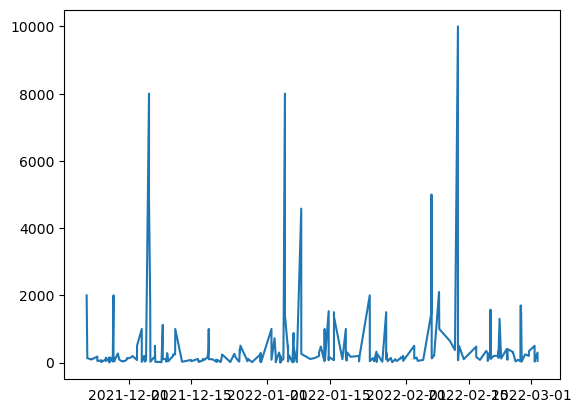

In [129]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [130]:
# day name wise bar chart/month wise bar chart
df['day_name']=df['Date'].dt.day_name()

In [131]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

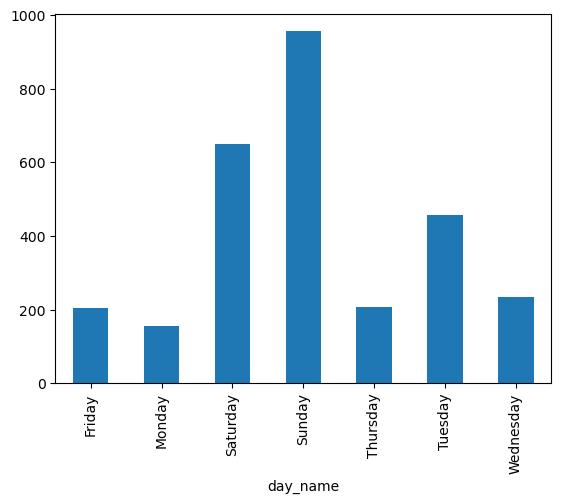

In [132]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [133]:
df['month_name']=df['Date'].dt.month_name()

In [134]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


In [135]:
df.groupby('month_name')['INR'].sum()

month_name
December    28644.44
February    36064.65
January     40320.51
March        1125.00
November     7623.40
Name: INR, dtype: float64

<Axes: xlabel='month_name'>

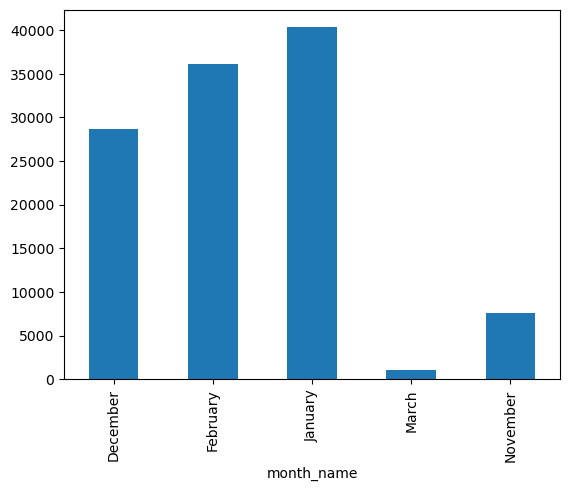

In [136]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')

In [137]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November
